In [59]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt


In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/student_scores.csv', names=None)
df

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [61]:
X = np.array(df['hours']).reshape(-1,1)
y = np.array(df['scores'])

LinReg = LinearRegression()
LinReg.fit(X, y)

LinearRegression()

In [62]:
np.random.seed(0)
X_new = np.random.randint(3,10, (len(y),1))
# print(X_new)

y_pred = LinReg.predict(X_new)
y_pred

array([70.91429714, 80.69010053, 31.81108358, 61.13849375, 61.13849375,
       61.13849375, 41.58688697, 61.13849375, 80.69010053, 51.36269036,
       70.91429714, 90.46590392, 31.81108358, 31.81108358, 70.91429714,
       51.36269036, 41.58688697, 90.46590392, 90.46590392, 31.81108358,
       41.58688697, 80.69010053, 41.58688697, 80.69010053, 31.81108358])

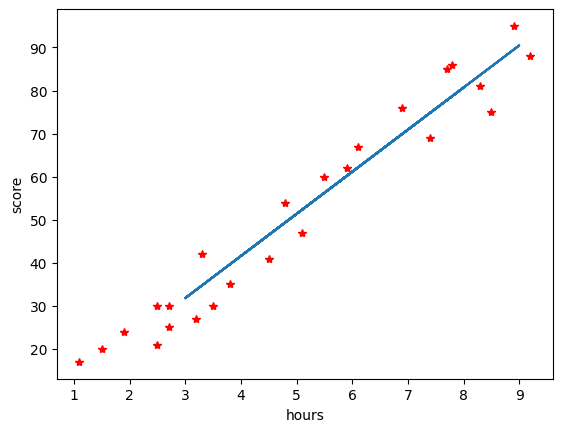

In [63]:
plt.plot(X_new, y_pred)
plt.xlabel('hours')
plt.ylabel('score')

plt.plot(X, y, 'r*')

plt.show()

In [64]:
print("Coefficient of determination/ Level of confidance:", round(LinReg.score(X, y),2))

Coefficient of determination/ Level of confidance: 0.95


In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 26.02838882702592
Mean Squared Error: 1027.8519125959187
Root Mean Squared Error: 32.0601296409718


<!-- Task 2 -->

In [66]:
from sklearn.model_selection import train_test_split

In [75]:
data = pd.read_csv('https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [85]:
# devide data into 2 selections train and test (20%)
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
# model train
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [89]:
# forecast
y_pred = LinReg.predict(X_test)

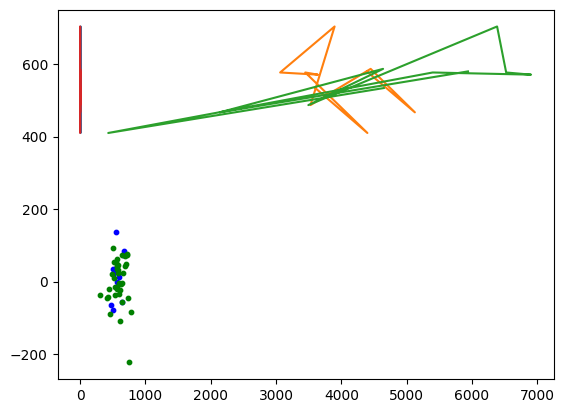

In [99]:
plt.scatter(LinReg.predict(X_test), LinReg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

plt.scatter(LinReg.predict(X_train), LinReg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

plt.plot(X_test, y_test)



In [100]:
print('Coefficient of determination/ Level of confidance:', round(LinReg.score(X, y),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficient of determination/ Level of confidance: 0.67
Mean Absolute Error: 56.822247478964776
Mean Squared Error: 4666.344787588374
Root Mean Squared Error: 68.31064915215177


In [ ]:


# Нормалізуємо дані в навчальній вибірці
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Побудова моделі множинної регресії
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Прогнозуємо результати на тестовій вибірці
y_pred = regressor.predict(X_test)

# Оцінюємо якість моделі
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))